# Model regresji liniowej

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as slm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

W przypadku wielowymiarowym równanie regresji, możemy przedstawić następująco 
$ y=a_{1}x_{1}+a_{2}x_{2}+...+a_{n}x_{n}+b$. Ponieważ w przykładzie mamy 4 zmienne objaśniane otrzymamy 4 wspólczynniki kierunkowe $a$ oraz jeden współczynnik przesunięcia $b$. Do generacji funkcji metodą najmniejszych kwadratów użyto `LinearRegression` z modułu `sklearn.linear_model`

In [2]:
df = pd.read_excel('data.xlsx')
df.dropna(inplace=True)
y = df['AT']
X = df.drop(columns=['AT'])
lin_reg_model = Lasso()
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30,random_state=1234)
lin_reg_model.fit(X, y)

a_values = ''
for i,a in enumerate(lin_reg_model.coef_):
    a_values += f'a{i+1}={round(a, 3)}  '
print(f'Współczynniki kierunkowe (a) modelu: {a_values}')
print(f'Współczynnik przesunięcia modelu: b={round(lin_reg_model.intercept_, 3)}')

Współczynniki kierunkowe (a) modelu: a1=0.054  a2=-0.037  a3=-0.104  a4=-0.334  
Współczynnik przesunięcia modelu: b=214.156


Następnie odbyła się analiza działania modelu. Jako ocenę dokładności wybrano średni błąd bezwzględny (MAE ang. mean absolute error). Należy jednak zauważyć, że model sprawdzany jest na zbiorze uczącym. Uzyskana niska wartość błędu nie musi świadczyć o jakościowo dobrym modelu, ponieważ nie zbadano jego możliwości generalizacji. W kolejnej części zostanie wykonany podział na zbiór uczący i testowy.

In [3]:
y_pred = lin_reg_model.predict(X)
print(f'Błąd średniokwadratowy modelu (MAE): {round(mean_absolute_error(y_pred, y),3)}')

Błąd średniokwadratowy modelu (MAE): 1.438


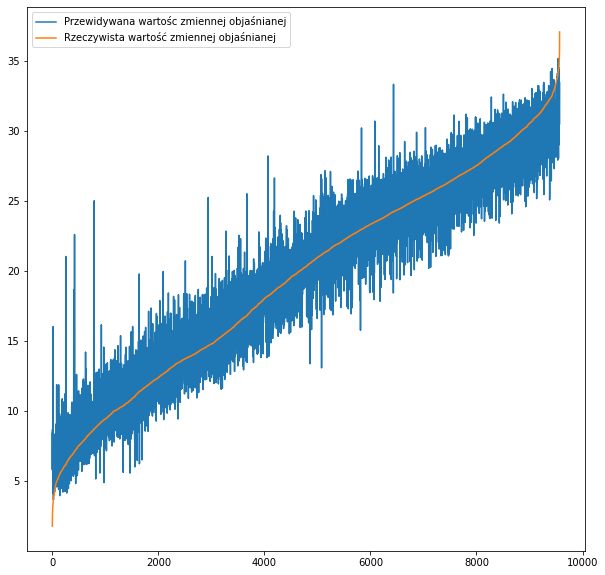

In [4]:
y = np.array(y)
y_to_plot = np.array([y, y_pred])
y_to_plot = y_to_plot.T
y_to_plot = y_to_plot[y_to_plot[:, 0].argsort()]
plt.figure(figsize=(10, 10))
plt.plot(np.arange(len(y)), y_to_plot[:,1], label='Przewidywana wartośc zmiennej objaśnianej')
plt.plot(np.arange(len(y)), y_to_plot[:,0], label='Rzeczywista wartość zmiennej objaśnianej')
plt.legend()
plt.show()